In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [110]:
jpeg_map = pd.read_csv("../measurements/jpeg_snr/map.csv")
# decom_map= pd.read_csv("../measurements/decomposition_per_frame/map.csv")
reg_map = pd.read_csv("../measurements/regression_snr/map.csv")
jpeg_cha = pd.read_csv("../measurements/jpeg_snr/characteristic.csv")
# decom_cha= pd.read_csv("../measurements/decomposition_per_frame/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_snr/characteristic.csv")

In [57]:
local_map = pd.read_csv("../../dynamic_framework/measurements/local/map.csv")

In [58]:
pruning_general=0.25

In [61]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
jpeg_quality = [60,70,80,90,100]

In [120]:
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in jpeg_quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy()
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

In [121]:
snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

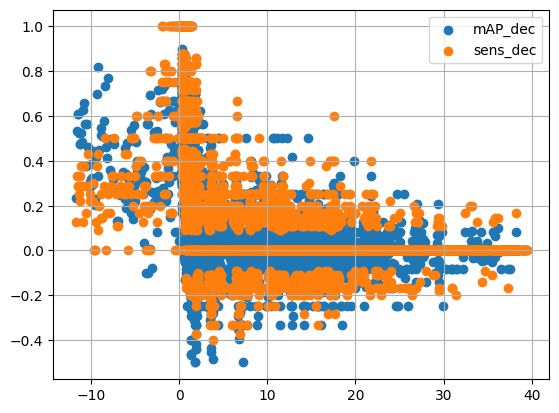

In [122]:

plt.figure()
plt.scatter(snr_cleaned, map_diff, label="mAP_dec")
plt.scatter(snr_cleaned, sens_diff, label= "sens_dec")
plt.legend()
plt.grid()


In [89]:
len(snr)

7000

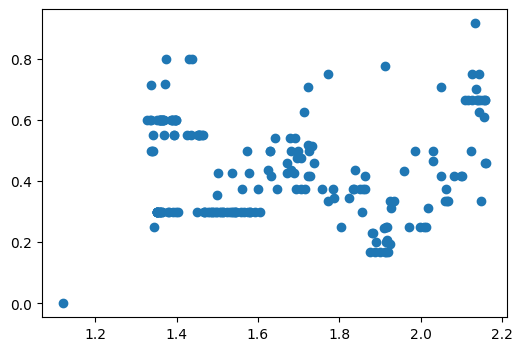

In [54]:
plt.figure(figsize=(6,4))
map_df_group = jpeg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
map_quality_df = map_df.groupby("quality")
map_plot_df= map_quality_df.get_group(70)
cha_df_group = jpeg_cha.groupby("pruning_thresh")
cha_df = cha_df_group.get_group(pruning_general)
cha_quality_df = cha_df.groupby("quality")
cha_plot_df= cha_quality_df.get_group(70)
plt.scatter(cha_plot_df["reconstruct_snr"].to_numpy(),map_plot_df["map"].to_numpy())

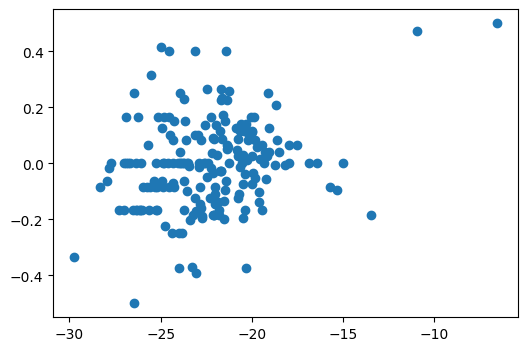

In [31]:
plt.figure(figsize=(6,4))
map_df_group = decom_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
map_quality_df = map_df.groupby("quality")
map_plot_df= map_quality_df.get_group(2)
cha_df_group = decom_cha.groupby("pruning_thresh")
cha_df = cha_df_group.get_group(pruning_general)
cha_quality_df = cha_df.groupby("quality")
cha_plot_df= cha_quality_df.get_group(2)
plt.scatter(cha_plot_df["reconstruct_snr"].to_numpy(),local_map["map"].to_numpy()-map_plot_df["map"].to_numpy())

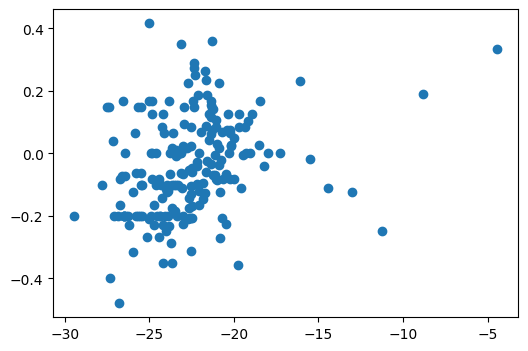

In [32]:
plt.figure(figsize=(6,4))
map_df_group = reg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
map_quality_df = map_df.groupby("quality")
map_plot_df= map_quality_df.get_group(2)
cha_df_group = reg_cha.groupby("pruning_thresh")
cha_df = cha_df_group.get_group(pruning_general)
cha_quality_df = cha_df.groupby("quality")
cha_plot_df= cha_quality_df.get_group(2)
plt.scatter(cha_plot_df["reconstruct_snr"].to_numpy(),local_map["map"].to_numpy()-map_plot_df["map"].to_numpy())